# **Import the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Import the data set**

In [2]:
train=pd.read_csv('train.csv')

In [3]:
test=pd.read_csv('test.csv')

# **Exploratory data analysis**

In [4]:
train.head()

,mobile_id,battery_power,bluetooth,clock_speed,dual_sim,front_cam,four_g,int_memory,mobile_depth,mobile_wt,n_cores,primary_cam,px_height,px_width,ram,screen_ht,screen_wid,talk_time,three_g,touch_screen,wifi,price_class
0,100001,898.0,Yes,0.4,Yes,2.0,Yes,High,1.2,59,3.0,3,48.0,1217,3249.0,7,0,8,Yes,No,Yes,0
1,100002,737.0,Yes,2.4,Yes,7.0,No,Medium,0.6,193,4.0,16,781.0,1463,2951.0,7,0,10,No,Yes,No,0
2,100003,1511.0,No,0.8,No,4.0,Yes,Medium,0.1,145,5.0,5,337.0,674,874.0,18,10,19,Yes,Yes,Yes,0
3,100004,1469.0,Yes,0.5,Yes,8.0,No,Medium,0.4,126,7.0,10,913.0,1049,3987.0,22,17,2,Yes,Yes,Yes,0
4,100005,1562.0,Yes,0.7,No,0.0,No,Medium,0.1,140,8.0,1,1032.0,1776,2096.0,15,3,3,No,No,No,1


In [5]:
test.head()

,mobile_id,battery_power,bluetooth,clock_speed,dual_sim,front_cam,four_g,int_memory,mobile_depth,mobile_wt,n_cores,primary_cam,px_height,px_width,ram,screen_ht,screen_wid,talk_time,three_g,touch_screen,wifi
0,107001,NaN,No,1.9,NaN,NaN,Yes,NaN,0.8,81,NaN,17,NaN,1618,NaN,18,8,13,Yes,Yes,NaN
1,107002,1206.0,No,3.0,Yes,10.0,Yes,Medium,0.6,127,3.0,13,1581.0,1713,1825.0,7,1,4,Yes,No,Yes
2,107003,1577.0,Yes,4.1,Yes,6.0,Yes,Medium,1.5,125,0.0,26,538.0,726,2786.0,4,1,4,Yes,Yes,No
3,107004,1930.0,No,3.6,Yes,13.0,No,Low,0.1,136,12.0,30,606.0,1971,3267.0,0,0,7,Yes,No,No
4,107005,568.0,No,1.8,Yes,36.0,Yes,Low,0.4,291,4.0,21,1823.0,1793,2796.0,24,24,4,Yes,Yes,Yes


In [6]:
train.dtypes

mobile_id          int64
battery_power    float64
bluetooth         object
clock_speed      float64
dual_sim          object
front_cam        float64
four_g            object
int_memory        object
mobile_depth     float64
mobile_wt          int64
n_cores          float64
primary_cam        int64
px_height        float64
px_width           int64
ram              float64
screen_ht          int64
screen_wid         int64
talk_time          int64
three_g           object
touch_screen      object
wifi              object
price_class        int64
dtype: object

In [7]:
train.describe()

,mobile_id,battery_power,clock_speed,front_cam,mobile_depth,mobile_wt,n_cores,primary_cam,px_height,px_width,ram,screen_ht,screen_wid,talk_time,price_class
count,7000.000000,6794.000000,7000.000000,6640.000000,7000.000000,7000.000000,6913.000000,7000.000000,6682.000000,7000.000000,6794.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,103500.500000,1235.698410,1.609943,5.316717,0.538057,139.985571,4.767684,10.909857,654.025292,1253.651286,2133.923315,12.300714,6.496143,11.364143,0.185714
std,2020.870275,448.817906,1.052165,5.488804,0.367049,50.275085,2.988280,7.458646,456.258787,450.806592,1094.070974,5.818172,5.444913,7.070753,0.388904
min,100001.000000,329.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,58.000000,27.000000,0.000000,0.000000,0.000000,0.000000
25%,101750.750000,845.250000,0.600000,1.000000,0.200000,102.000000,2.000000,4.000000,284.000000,872.000000,1201.000000,8.000000,2.000000,5.000000,0.000000
50%,103500.500000,1230.000000,1.500000,4.000000,0.500000,139.000000,4.000000,10.000000,577.000000,1250.000000,2163.500000,12.000000,5.000000,11.000000,0.000000
75%,105250.250000,1613.000000,2.400000,8.000000,0.800000,177.000000,7.000000,16.000000,956.000000,1643.000000,3092.750000,17.000000,10.000000,17.000000,0.000000
max,107000.000000,2237.000000,5.500000,35.000000,1.900000,309.000000,15.000000,40.000000,2210.000000,2298.000000,4270.000000,32.000000,33.000000,37.000000,1.000000


# **Check missing & outliers for train data**

In [8]:
train.isnull().sum()

mobile_id          0
battery_power    206
bluetooth          0
clock_speed        0
dual_sim         293
front_cam        360
four_g             0
int_memory       228
mobile_depth       0
mobile_wt          0
n_cores           87
primary_cam        0
px_height        318
px_width           0
ram              206
screen_ht          0
screen_wid         0
talk_time          0
three_g            0
touch_screen       0
wifi              82
price_class        0
dtype: int64

# replace missing values of numerical variables with 'mean' and categorical column with 'mode'

In [9]:
train['battery_power'].fillna(train['battery_power'].mean(),inplace=True)

In [10]:
train['front_cam'].fillna(train['front_cam'].mean(),inplace=True)

In [11]:
train['int_memory'].fillna(train['int_memory'].mode()[0],inplace=True)

In [12]:
train['dual_sim'].fillna(train['dual_sim'].mode()[0],inplace=True)

In [13]:
train['n_cores'].fillna(train['n_cores'].mean(),inplace=True)

In [14]:
train['px_height'].fillna(train['px_height'].mean(),inplace=True)

In [15]:
train['ram'].fillna(train['ram'].mean(),inplace=True)

In [16]:
train['wifi'].fillna(train['wifi'].mode()[0],inplace=True)

In [17]:
train.isnull().sum()

mobile_id        0
battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
front_cam        0
four_g           0
int_memory       0
mobile_depth     0
mobile_wt        0
n_cores          0
primary_cam      0
px_height        0
px_width         0
ram              0
screen_ht        0
screen_wid       0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_class      0
dtype: int64

# **check outliers**

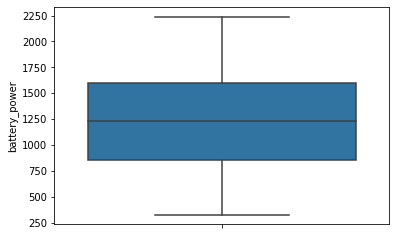

In [18]:
sns.boxplot(y='battery_power',data=train)

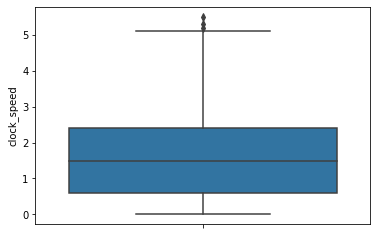

In [19]:
sns.boxplot(y='clock_speed',data=train)

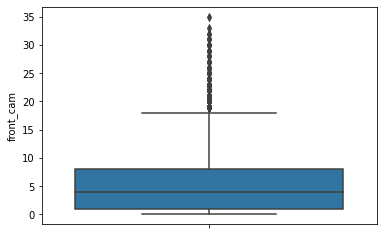

In [20]:
sns.boxplot(y='front_cam',data=train)

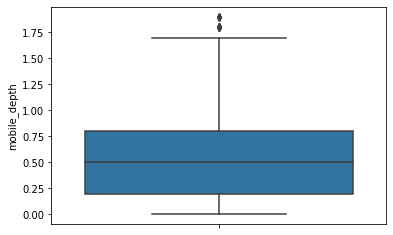

In [21]:
sns.boxplot(y='mobile_depth',data=train)

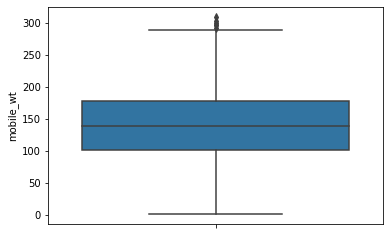

In [22]:
sns.boxplot(y='mobile_wt',data=train)

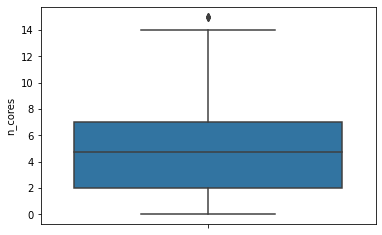

In [23]:
sns.boxplot(y='n_cores',data=train)

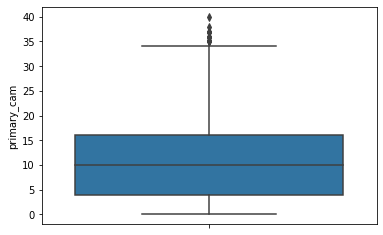

In [24]:
sns.boxplot(y='primary_cam',data=train)

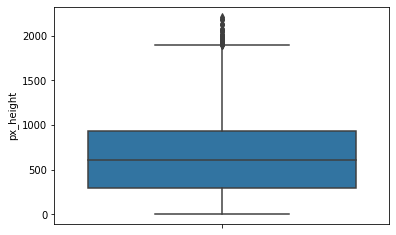

In [25]:
sns.boxplot(y='px_height',data=train)

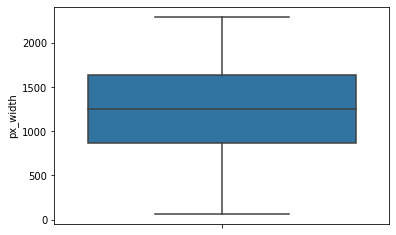

In [26]:
sns.boxplot(y='px_width',data=train)

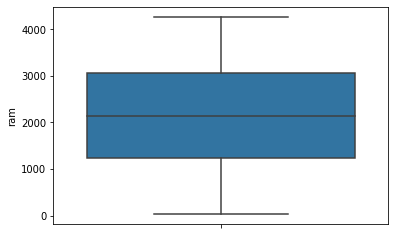

In [27]:
sns.boxplot(y='ram',data=train)

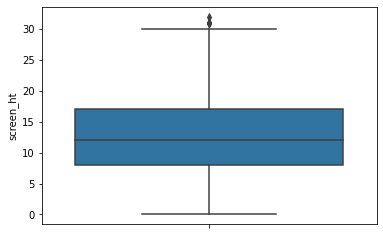

In [28]:
sns.boxplot(y='screen_ht',data=train)

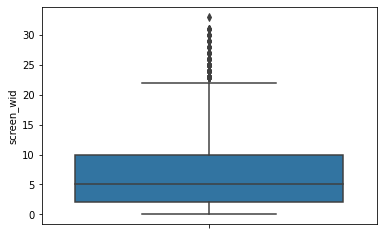

In [29]:
sns.boxplot(y='screen_wid',data=train)

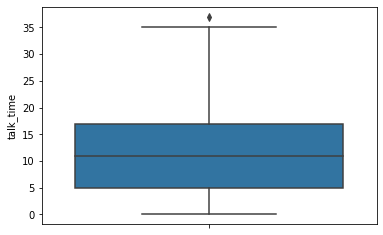

In [30]:
sns.boxplot(y='talk_time',data=train)

# there are outliers in clock_speed, front_cam, mobile_depth, mobile_wt ,n_cores, primary_cam, px_height, screen_ht, scren_wid

In [31]:
Q1=train['clock_speed'].quantile(0.25)
Q3=train['clock_speed'].quantile(0.75)
IQR=Q3-Q1

In [32]:
upper_whisker=Q3+1.5*IQR
lower_whisker=Q1-1.5*IQR

In [33]:
train=train[train['clock_speed']<upper_whisker]

In [34]:
Q1=train['front_cam'].quantile(0.25)
Q3=train['front_cam'].quantile(0.75)
IQR=Q3-Q1

In [35]:
upper_whisker=Q3+1.5*IQR
lower_whisker=Q1-1.5*IQR

In [36]:
train=train[train['front_cam']<upper_whisker]

In [37]:
Q1=train['mobile_depth'].quantile(0.25)
Q3=train['mobile_depth'].quantile(0.75)
IQR=Q3-Q1

In [38]:
upper_whisker=Q3+1.5*IQR
lower_whisker=Q1-1.5*IQR

In [39]:
train=train[train['mobile_depth']<upper_whisker]

In [40]:
Q1=train['mobile_wt'].quantile(0.25)
Q3=train['mobile_wt'].quantile(0.75)
IQR=Q3-Q1

In [41]:
upper_whisker=Q3+1.5*IQR
lower_whisker=Q1-1.5*IQR

In [42]:
train=train[train['mobile_wt']<upper_whisker]

In [43]:
Q1=train['n_cores'].quantile(0.25)
Q3=train['n_cores'].quantile(0.75)
IQR=Q3-Q1

In [44]:
upper_whisker=Q3+1.5*IQR
lower_whisker=Q1-1.5*IQR

In [45]:
train=train[train['n_cores']<upper_whisker]

In [46]:
Q1=train['primary_cam'].quantile(0.25)
Q3=train['primary_cam'].quantile(0.75)
IQR=Q3-Q1

In [47]:
upper_whisker=Q3+1.5*IQR
lower_whisker=Q1-1.5*IQR

In [48]:
train=train[train['primary_cam']<upper_whisker]

In [49]:
Q1=train['px_height'].quantile(0.25)
Q3=train['px_height'].quantile(0.75)
IQR=Q3-Q1

In [50]:
upper_whisker=Q3+1.5*IQR
lower_whisker=Q1-1.5*IQR

In [51]:
train=train[train['px_height']<upper_whisker]

In [52]:
Q1=train['screen_ht'].quantile(0.25)
Q3=train['screen_ht'].quantile(0.75)
IQR=Q3-Q1

In [53]:
upper_whisker=Q3+1.5*IQR
lower_whisker=Q1-1.5*IQR

In [54]:
train=train[train['screen_ht']<upper_whisker]

In [55]:
Q1=train['screen_wid'].quantile(0.25)
Q3=train['screen_wid'].quantile(0.75)
IQR=Q3-Q1

In [56]:
upper_whisker=Q3+1.5*IQR
lower_whisker=Q1-1.5*IQR

In [57]:
train=train[train['screen_wid']<upper_whisker]

# **Type casting - converting data from one type to another**

# lets convert categorical columns to numeric

In [58]:
train.dtypes

mobile_id          int64
battery_power    float64
bluetooth         object
clock_speed      float64
dual_sim          object
front_cam        float64
four_g            object
int_memory        object
mobile_depth     float64
mobile_wt          int64
n_cores          float64
primary_cam        int64
px_height        float64
px_width           int64
ram              float64
screen_ht          int64
screen_wid         int64
talk_time          int64
three_g           object
touch_screen      object
wifi              object
price_class        int64
dtype: object

In [59]:
train['bluetooth'].replace('Yes',1,inplace=True)

In [60]:
train['bluetooth'].replace('No',0,inplace=True)

In [61]:
train['dual_sim'].replace('Yes',1,inplace=True)

In [62]:
train['dual_sim'].replace('No',0,inplace=True)

In [63]:
train['four_g'].replace('Yes',1,inplace=True)

In [64]:
train['four_g'].replace('No',0,inplace=True)

In [65]:
train['three_g'].replace('Yes',1,inplace=True)

In [66]:
train['three_g'].replace('No',0,inplace=True)

In [67]:
train['touch_screen'].replace('Yes',1,inplace=True)

In [68]:
train['touch_screen'].replace('No',0,inplace=True)

In [69]:
train['wifi'].replace('Yes',1,inplace=True)

In [70]:
train['wifi'].replace('No',0,inplace=True)

In [71]:
train['int_memory'].replace('Low',0,inplace=True)

In [72]:
train['int_memory'].replace('Medium',1,inplace=True)

In [73]:
train['int_memory'].replace('High',2,inplace=True)

In [74]:
train.dtypes

mobile_id          int64
battery_power    float64
bluetooth          int64
clock_speed      float64
dual_sim           int64
front_cam        float64
four_g             int64
int_memory         int64
mobile_depth     float64
mobile_wt          int64
n_cores          float64
primary_cam        int64
px_height        float64
px_width           int64
ram              float64
screen_ht          int64
screen_wid         int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_class        int64
dtype: object

# converting columns from categorical to numeric -test data

In [75]:
test.dtypes

mobile_id          int64
battery_power    float64
bluetooth         object
clock_speed      float64
dual_sim          object
front_cam        float64
four_g            object
int_memory        object
mobile_depth     float64
mobile_wt          int64
n_cores          float64
primary_cam        int64
px_height        float64
px_width           int64
ram              float64
screen_ht          int64
screen_wid         int64
talk_time          int64
three_g           object
touch_screen      object
wifi              object
dtype: object

In [76]:
test['bluetooth'].replace('Yes',1,inplace=True)

In [77]:
test['bluetooth'].replace('No',0,inplace=True)

In [78]:
test['dual_sim'].replace('Yes',1,inplace=True)

In [79]:
test['dual_sim'].replace('No',0,inplace=True)

In [80]:
test['four_g'].replace('Yes',1,inplace=True)

In [81]:
test['four_g'].replace('No',0,inplace=True)

In [82]:
test['three_g'].replace('Yes',1,inplace=True)

In [83]:
test['three_g'].replace('No',0,inplace=True)

In [84]:
test['touch_screen'].replace('Yes',1,inplace=True)

In [85]:
test['touch_screen'].replace('No',0,inplace=True)

In [86]:
test['wifi'].replace('Yes',1,inplace=True)

In [87]:
test['wifi'].replace('No',0,inplace=True)

In [88]:
test['int_memory'].replace('Low',0,inplace=True)

In [89]:
test['int_memory'].replace('Medium',1,inplace=True)

In [90]:
test['int_memory'].replace('High',2,inplace=True)

In [91]:
test['int_memory'].fillna(test['int_memory'].mode()[0],inplace=True)

# **check missing and outliers for test data**

In [92]:
test.isnull().sum()

mobile_id          0
battery_power     78
bluetooth          0
clock_speed        0
dual_sim         106
front_cam        131
four_g             0
int_memory         0
mobile_depth       0
mobile_wt          0
n_cores           45
primary_cam        0
px_height        116
px_width           0
ram               77
screen_ht          0
screen_wid         0
talk_time          0
three_g            0
touch_screen       0
wifi              43
dtype: int64

# let us replace missing values in numerical variables with mean and categorical variables with mode

In [93]:
test['battery_power'].fillna(test['battery_power'].mean(),inplace=True)

In [94]:
test['n_cores'].fillna(test['n_cores'].mean(),inplace=True)

In [95]:
test['px_height'].fillna(test['px_height'].mean(),inplace=True)

In [96]:
test['ram'].fillna(test['ram'].mean(),inplace=True)

In [97]:
test['front_cam'].fillna(test['front_cam'].mean(),inplace=True)

In [98]:
test['dual_sim'].fillna(test['dual_sim'].mode()[0],inplace=True)

In [99]:
test['wifi'].fillna(test['wifi'].mode()[0],inplace=True)

In [100]:
test.isnull().sum()

mobile_id        0
battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
front_cam        0
four_g           0
int_memory       0
mobile_depth     0
mobile_wt        0
n_cores          0
primary_cam      0
px_height        0
px_width         0
ram              0
screen_ht        0
screen_wid       0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

# **check outliers for test data**

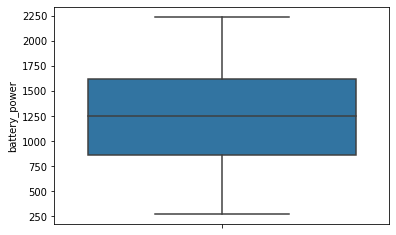

In [101]:
sns.boxplot(y='battery_power',data=test)

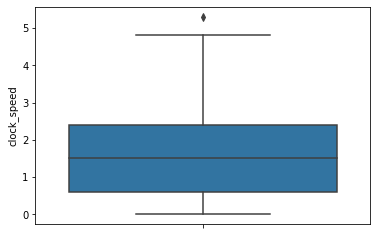

In [102]:
sns.boxplot(y='clock_speed',data=test)

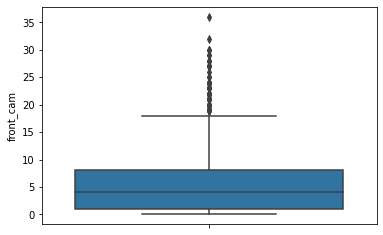

In [103]:
sns.boxplot(y='front_cam',data=test)

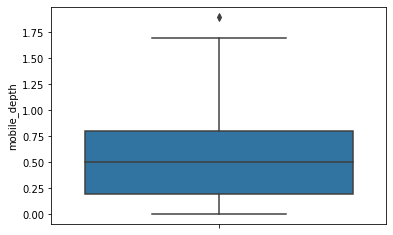

In [104]:
sns.boxplot(y='mobile_depth',data=test)

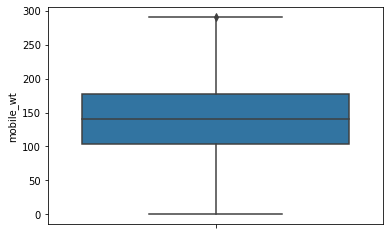

In [105]:
sns.boxplot(y='mobile_wt',data=test)

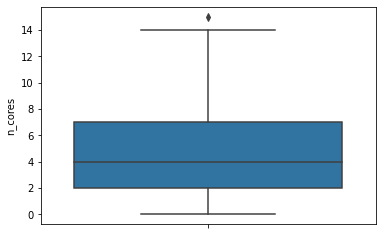

In [106]:
sns.boxplot(y='n_cores',data=test)

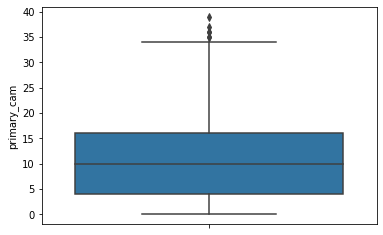

In [107]:
sns.boxplot(y='primary_cam',data=test)

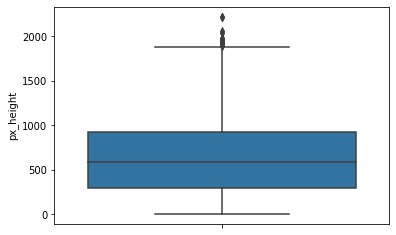

In [108]:
sns.boxplot(y='px_height',data=test)

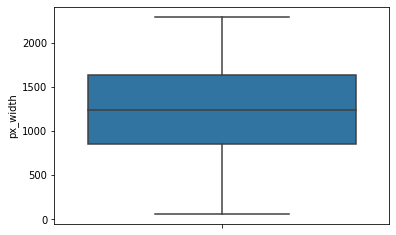

In [109]:
sns.boxplot(y='px_width',data=test)

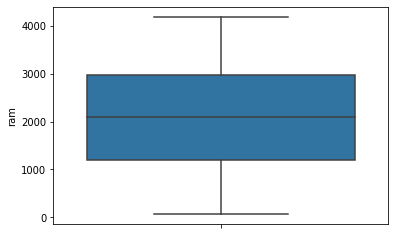

In [110]:
sns.boxplot(y='ram',data=test)

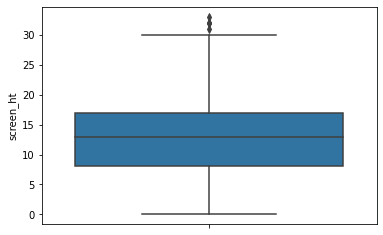

In [111]:
sns.boxplot(y='screen_ht',data=test)

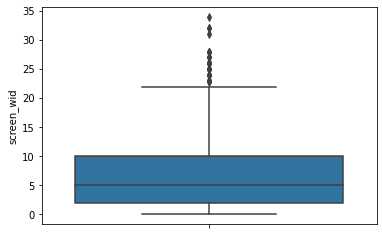

In [112]:
sns.boxplot(y='screen_wid',data=test)

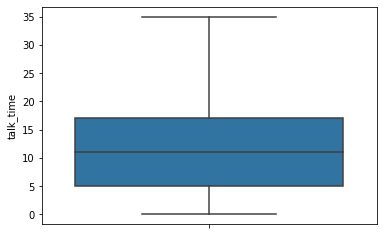

In [113]:
sns.boxplot(y='talk_time',data=test)

# A lot of columns have outliers , let us remove them

In [114]:
 Q1=test['clock_speed'].quantile(0.25)
 Q3=test['clock_speed'].quantile(0.75)
 IQR=Q3-Q1

In [115]:
upper_whisker=Q3+1.5*IQR
lower_whisker=Q1-1.5*IQR

In [116]:
test=test[test['clock_speed']<upper_whisker]

In [117]:
Q1=test['front_cam'].quantile(0.25)
Q3=test['front_cam'].quantile(0.75)
IQR=Q3-Q1

In [118]:
upper_whisker=Q3+1.5*IQR
lower_whisker=Q1-1.5*IQR

In [119]:
test=test[test['front_cam']<upper_whisker]

In [120]:
Q1=test['mobile_depth'].quantile(0.25)
Q3=test['mobile_depth'].quantile(0.75)
IQR=Q3-Q1

In [121]:
upper_whisker=Q3+1.5*IQR
lower_whisker=Q1-1.5*IQR

In [122]:
test=test[test['mobile_depth']<upper_whisker]

In [123]:
Q1=test['mobile_wt'].quantile(0.25)
Q3=test['mobile_wt'].quantile(0.75)
IQR=Q3-Q1

In [124]:
upper_whisker=Q3+1.5*IQR
lower_whisker=Q1-1.5*IQR

In [125]:
test=test[test['mobile_wt']<upper_whisker]

In [126]:
Q1=test['n_cores'].quantile(0.25)
Q3=test['n_cores'].quantile(0.75)
IQR=Q3-Q1

In [127]:
upper_whisker=Q3+1.5*IQR
lower_whisker=Q1-1.5*IQR

In [128]:
test=test[test['n_cores']<upper_whisker]

In [129]:
Q1=test['primary_cam'].quantile(0.25)
Q3=test['primary_cam'].quantile(0.75)
IQR=Q3-Q1

In [130]:
upper_whisker=Q3+1.5*IQR
lower_whisker=Q1-1.5*IQR

In [131]:
test=test[test['primary_cam']<upper_whisker]

In [132]:
Q1=test['px_height'].quantile(0.25)
Q3=test['px_height'].quantile(0.75)
IQR=Q3-Q1

In [133]:
upper_whisker=Q3+1.5*IQR
lower_whisker=Q1-1.5*IQR

In [134]:
test=test[test['px_height']<upper_whisker]

In [135]:
Q1=test['screen_ht'].quantile(0.25)
Q3=test['screen_ht'].quantile(0.75)
IQR=Q3-Q1

In [136]:
upper_whisker=Q3+1.5*IQR
lower_whisker=Q1-1.5*IQR

In [137]:
test=test[test['screen_ht']<upper_whisker]

In [138]:
Q1=test['screen_wid'].quantile(0.25)
Q3=test['screen_wid'].quantile(0.75)
IQR=Q3-Q1

In [139]:
upper_whisker=Q3+1.5*IQR
lower_whisker=Q1-1.5*IQR

In [140]:
test=test[test['screen_wid']<upper_whisker]

In [141]:
Q1=test['talk_time'].quantile(0.25)
Q3=test['talk_time'].quantile(0.75)
IQR=Q3-Q1

In [142]:
upper_whisker=Q3+1.5*IQR
lower_whisker=Q1-1.5*IQR

In [143]:
test=test[test['talk_time']<upper_whisker]

# **Machine Learning Prediction**

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X_train=train.drop(['price_class'],axis=1)
y_train=train['price_class']

# **Logistic Regression**

In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
lr=LogisticRegression()

In [148]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [151]:
lr.score(X_train,y_train)

0.8306085376930064

# **KNN**

In [163]:
from sklearn.neighbors import KNeighborsClassifier

In [164]:
KNN=KNeighborsClassifier()

In [165]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [178]:
KNN.score(X_train,y_train)

0.9100817438692098

# **Decision Tree**

In [167]:
from sklearn.tree import DecisionTreeClassifier

In [168]:
dt=DecisionTreeClassifier()

In [169]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [179]:
dt.score(X_train,y_train)

1.0

# **Random Forest**

In [175]:
from sklearn.ensemble import RandomForestClassifier

In [176]:
rf=RandomForestClassifier()

In [177]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [180]:
rf.score(X_train,y_train)

1.0

# **SVM**

In [181]:
from sklearn.svm import SVC

In [182]:
sv=SVC()

In [183]:
sv.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [184]:
sv.score(X_train,y_train)

0.8186497123826824

# **Naive Bayes**

In [185]:
from sklearn.naive_bayes import GaussianNB

In [186]:
nb=GaussianNB()

In [187]:
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [188]:
nb.score(X_train,y_train)

0.8748107780805329

# **XG Boost**

In [189]:
from xgboost import XGBClassifier

In [190]:
xg=XGBClassifier()

In [191]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# **Gradient Boost**

In [192]:
from sklearn.ensemble import GradientBoostingClassifier

In [193]:
gb=GradientBoostingClassifier()

In [194]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [195]:
gb.score(X_train,y_train)

0.9498940357250983

# **Applying models on the tes data**

## Decision tree and Random forest has better accuracy, so we will appy Decision tree model on the test data

In [196]:
preddt=dt.predict(test)

In [197]:
test['price_class']=preddt

In [198]:
test

,mobile_id,battery_power,bluetooth,clock_speed,dual_sim,front_cam,four_g,int_memory,mobile_depth,mobile_wt,n_cores,primary_cam,px_height,px_width,ram,screen_ht,screen_wid,talk_time,three_g,touch_screen,wifi,price_class
0,107001,1249.363107,0,1.9,1.0,5.335657,1,1.0,0.8,81,4.68934,17,649.212899,1618,2087.647622,18,8,13,1,1,1.0,0
1,107002,1206.000000,0,3.0,1.0,10.000000,1,1.0,0.6,127,3.00000,13,1581.000000,1713,1825.000000,7,1,4,1,0,1.0,1
2,107003,1577.000000,1,4.1,1.0,6.000000,1,1.0,1.5,125,0.00000,26,538.000000,726,2786.000000,4,1,4,1,1,0.0,1
3,107004,1930.000000,0,3.6,1.0,13.000000,0,0.0,0.1,136,12.00000,30,606.000000,1971,3267.000000,0,0,7,1,0,0.0,1
5,107006,691.000000,1,2.7,1.0,4.000000,1,1.0,0.9,108,4.00000,8,951.000000,962,424.000000,5,3,15,1,1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,109995,1118.000000,1,3.0,1.0,12.000000,1,0.0,0.3,127,5.00000,16,607.000000,1426,3789.000000,14,13,16,1,0,1.0,0
2995,109996,781.000000,1,2.1,0.0,4.000000,0,0.0,0.5,109,8.00000,3,594.000000,1064,3358.000000,20,19,21,1,0,1.0,0
2996,109997,909.000000,1,2.2,1.0,12.000000,1,0.0,0.0,172,7.00000,19,1306.000000,1473,3154.000000,7,1,10,1,1,0.0,0
2998,109999,694.000000,0,0.5,0.0,6.000000,0,1.0,0.3,199,3.00000,8,649.000000,906,2627.000000,18,8,9,0,0,1.0,0
